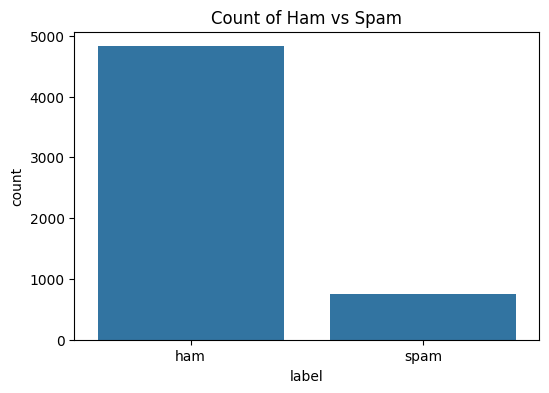

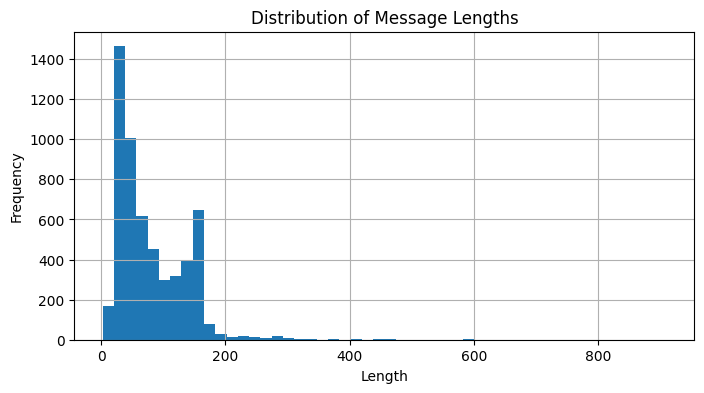

Confusion Matrix:
 [[963   2]
 [ 16 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy Score: 0.9838565022421525

Sample Message: Win a $1000 prize! Click now to claim.
Prediction: Spam


In [ ]:

# --------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv(r'D:/codtec_internship/Task_4/spam_email_dataset.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# EDA
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label')
plt.title("Count of Ham vs Spam")
plt.show()

df['message_length'] = df['message'].apply(len)
plt.figure(figsize=(8, 4))
df['message_length'].hist(bins=50)
plt.title("Distribution of Message Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

# Preprocessing
X = df['message']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model training
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test_vec)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Test on sample message
sample_msg = ["Win a $1000 prize! Click now to claim."]
sample_vec = vectorizer.transform(sample_msg)
predicted = model.predict(sample_vec)

print("\nSample Message:", sample_msg[0])
print("Prediction:", "Spam" if predicted[0] == 1 else "Ham")
